In [2]:
from utils import *

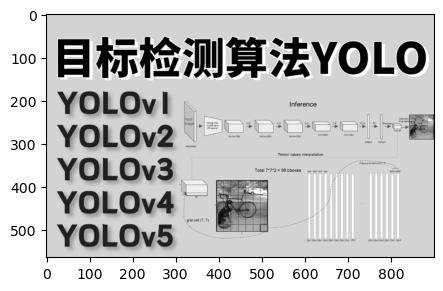

In [3]:
img = readImage('./input/test.png')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')

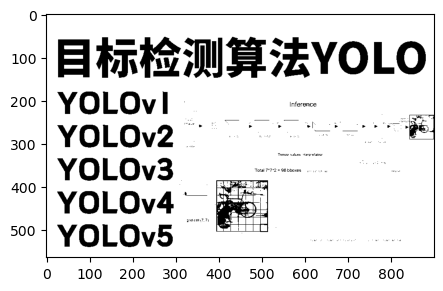

In [4]:
ret, img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
showImage(img_binary, cmap='gray')

In [5]:
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
hierarchy.shape

(1, 597, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


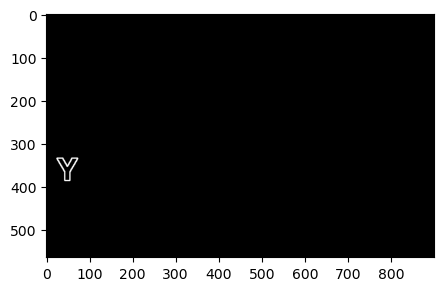

In [37]:
dest = cv.drawContours(np.zeros(img.shape), contours, 304, (255, 255, 255), 2)
showImage(dest)

In [38]:
cnt = contours[304]
M = cv.moments(cnt)
cnt, M

(array([[[ 25, 335]],
 
        [[ 26, 334]],
 
        [[ 38, 334]],
 
        [[ 39, 335]],
 
        [[ 39, 336]],
 
        [[ 40, 337]],
 
        [[ 40, 338]],
 
        [[ 42, 340]],
 
        [[ 42, 341]],
 
        [[ 43, 342]],
 
        [[ 43, 343]],
 
        [[ 44, 344]],
 
        [[ 44, 345]],
 
        [[ 46, 347]],
 
        [[ 46, 348]],
 
        [[ 47, 349]],
 
        [[ 47, 350]],
 
        [[ 48, 351]],
 
        [[ 48, 352]],
 
        [[ 49, 353]],
 
        [[ 50, 352]],
 
        [[ 50, 351]],
 
        [[ 52, 349]],
 
        [[ 52, 348]],
 
        [[ 53, 347]],
 
        [[ 53, 346]],
 
        [[ 54, 345]],
 
        [[ 54, 344]],
 
        [[ 56, 342]],
 
        [[ 56, 341]],
 
        [[ 57, 340]],
 
        [[ 57, 339]],
 
        [[ 58, 338]],
 
        [[ 58, 337]],
 
        [[ 59, 336]],
 
        [[ 59, 335]],
 
        [[ 60, 334]],
 
        [[ 72, 334]],
 
        [[ 73, 335]],
 
        [[ 72, 336]],
 
        [[ 72, 337]],
 
        [[ 71, 3

In [39]:
cv.HuMoments(M)

array([[ 3.02995293e-01],
       [ 1.00982017e-02],
       [ 2.39686688e-02],
       [ 6.07420090e-05],
       [ 7.31638483e-08],
       [ 6.09891526e-06],
       [-4.32973311e-09]])

In [40]:
cv.contourArea(cnt)

1002.0

In [41]:
cv.arcLength(cnt, True)

201.68123936653137

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


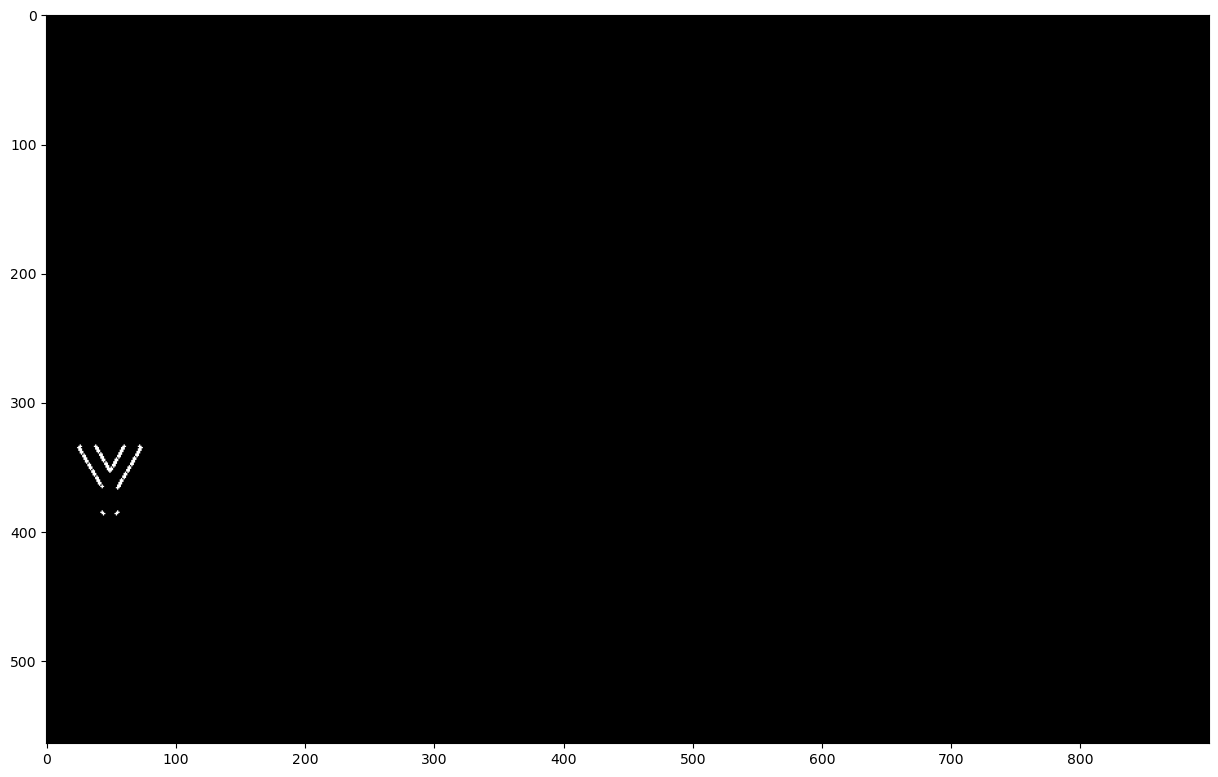

In [48]:
epsilon = 0.001 * cv.arcLength(cnt, True)
dest = cv.approxPolyDP(cnt, epsilon, True)
dest = cv.drawContours(np.zeros(img.shape), dest, -1, (255, 255, 255), 2)
showImage(dest, figsize=(15, 15), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


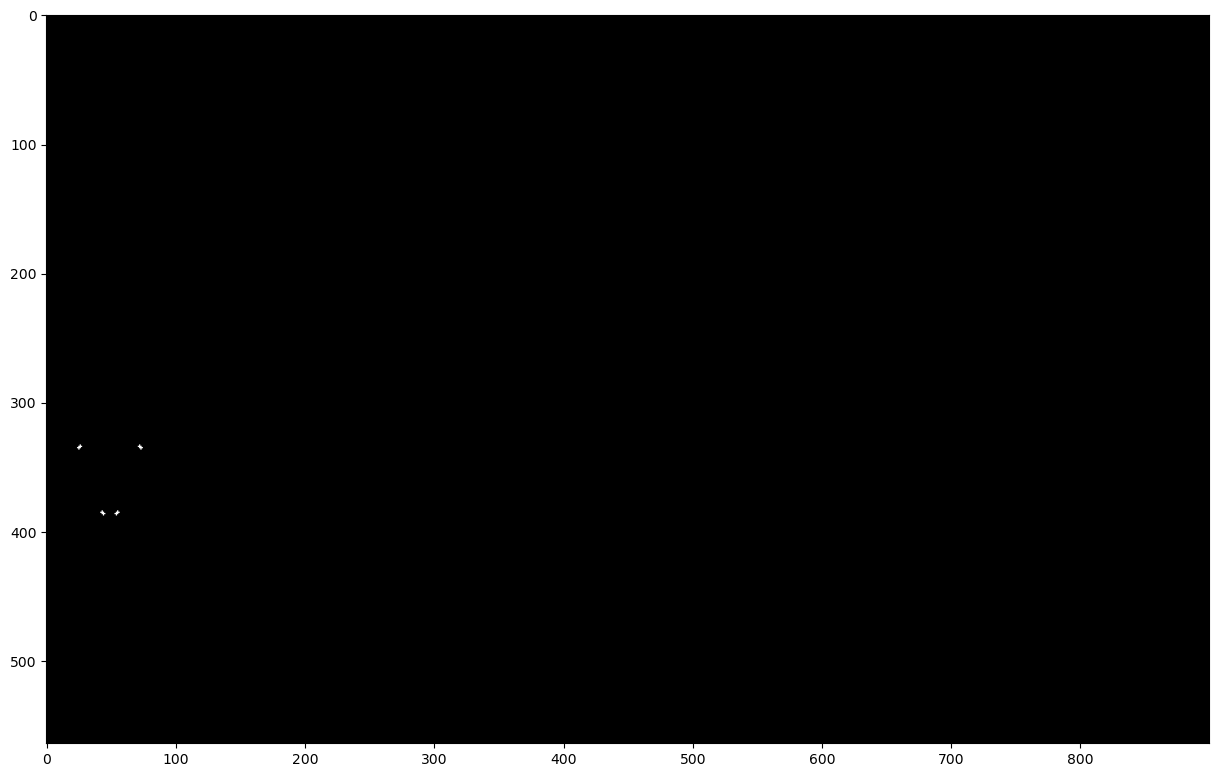

In [52]:
dest = cv.convexHull(cnt)
dest = cv.drawContours(np.zeros(img.shape), dest, -1, (255, 255, 255), 2)
showImage(dest, figsize=(15, 15), cmap='gray')

In [53]:
cv.isContourConvex(cnt)

False

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


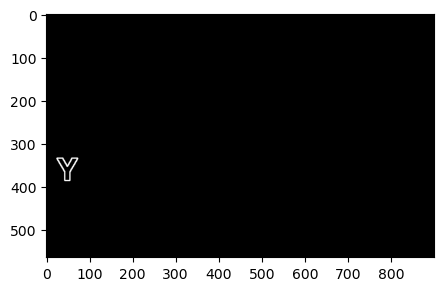

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


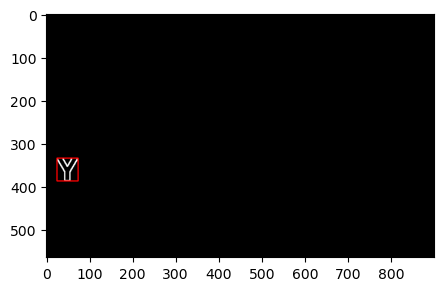

In [63]:
dest = cv.drawContours(np.zeros(img.shape), contours, 304, (255, 255, 255), 2)
showImage(dest)
rect = np.array(cv.boundingRect(cnt))
cv.rectangle(dest, rect[:2], rect[:2]+rect[2:4], (255, 0, 0), 2)
showImage(dest)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


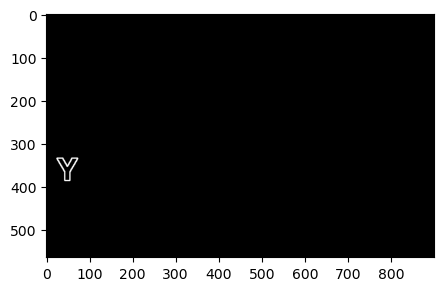

C:\Users\25335\AppData\Local\Temp\ipykernel_82064\1745332967.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


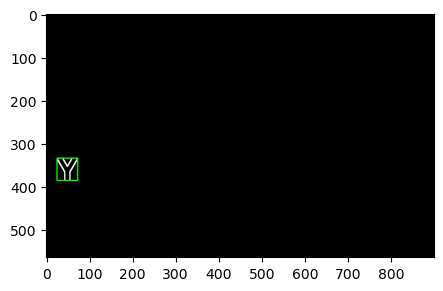

In [67]:
dest = cv.drawContours(np.zeros(img.shape), contours, 304, (255, 255, 255), 2)
showImage(dest)
rect = np.array(cv.boundingRect(cnt))
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
dest = cv.drawContours(dest,[box],0,(0,255,0),2)
showImage(dest)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


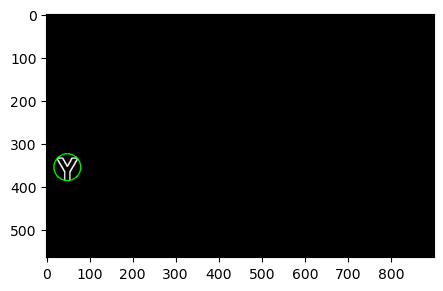

In [68]:
dest = cv.drawContours(np.zeros(img.shape), contours, 304, (255, 255, 255), 2)
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
dest = cv.circle(dest,center,radius,(0,255,0),2)
showImage(dest)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


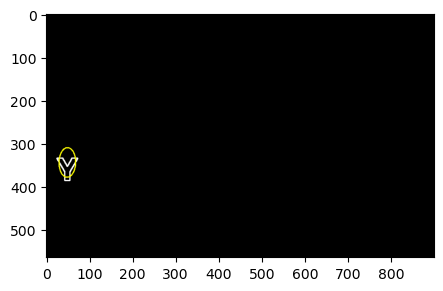

In [71]:
dest = cv.drawContours(np.zeros(img.shape), contours, 304, (255, 255, 255), 2)
ellipse = cv.fitEllipse(cnt)
showImage(cv.ellipse(dest, ellipse, (255, 255, 0), 2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


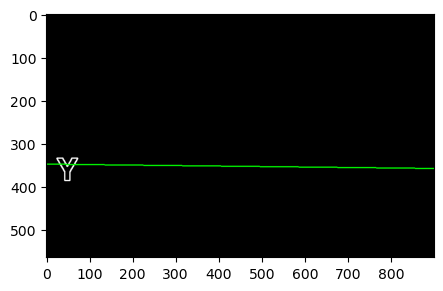

In [72]:
dest = cv.drawContours(np.zeros(img.shape), contours, 304, (255, 255, 255), 2)
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(dest,(cols-1,righty),(0,lefty),(0,255,0),2)
showImage(dest)


In [80]:
cnt.shape

(95, 1, 2)

In [75]:
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
hull, defects

(array([[ 0],
        [ 1],
        [37],
        [38],
        [66],
        [67],
        [68],
        [69]], dtype=int32),
 array([[[  69,    0,   70, 1734]],
 
        [[   1,   37,   19, 4864]],
 
        [[  38,   66,   65, 1648]]], dtype=int32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


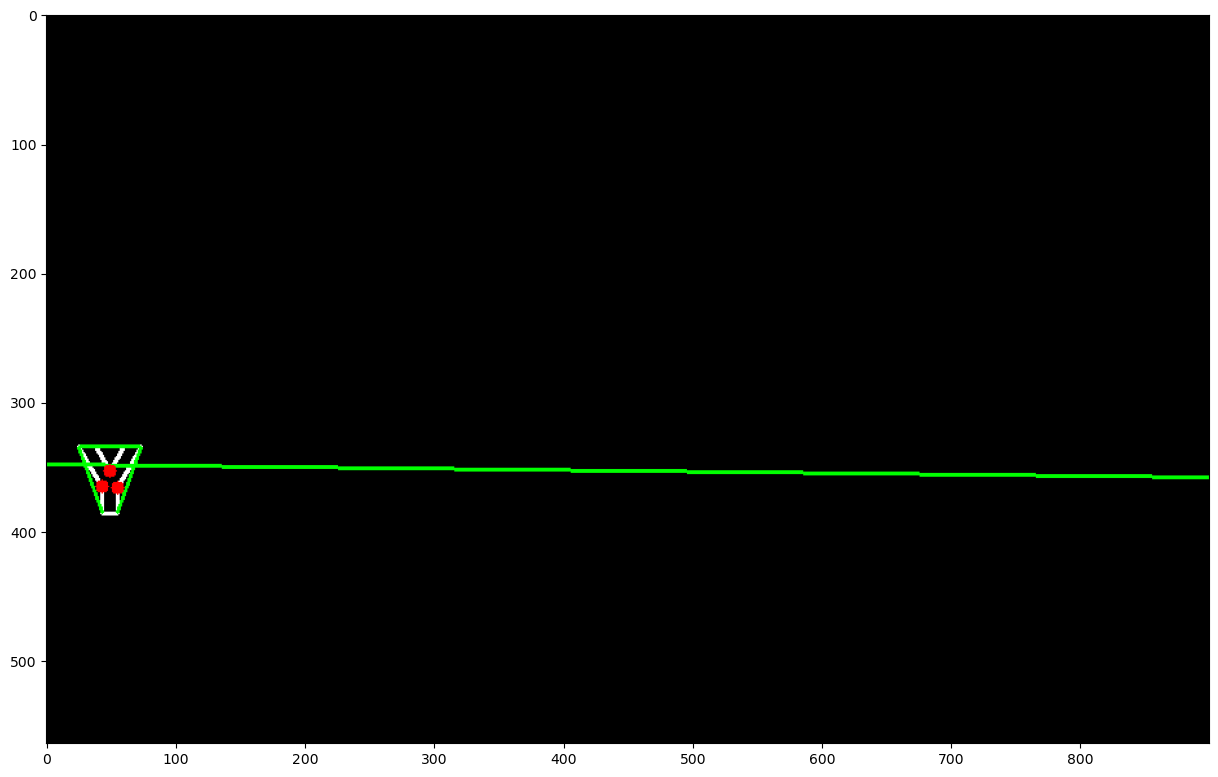

In [82]:
for i in defects:
    s,e,f,d = i[0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(dest,start,end,[0,255,0],2)
    cv.circle(dest,far,3,[255,0,0],-1)
showImage(dest, figsize=(15, 15))

In [83]:
cnt[0]

array([[ 25, 335]], dtype=int32)

In [91]:
(
    cv.pointPolygonTest(cnt,(30, 340), True),
    cv.pointPolygonTest(cnt,(30, 10), True),
    cv.pointPolygonTest(cnt,(25, 335), False),
)


(1.4142135623730951, -324.0, 0.0)

In [92]:
cv.matchShapes(cnt,cnt,1,0.0)

0.0